In [156]:
from astropy.io import fits,ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import ks_2samp
from astropy import units as u

In [157]:
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/APPSS/')
from a100sdss import ks, anderson
sys.path.append(homedir+'/github/LCS/python/Python3/')
from LCScommon import *

In [158]:
plotdir = homedir+'/research/LCS/plots/'


# Write Out Files for Benedetta

* GSWLC, LCS core, LCS infall
* B/T < 0.3

In [198]:
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433


<Figure size 489.6x360 with 0 Axes>

In [204]:
# create flag to select gsw sample
gflag = (b.gsw.cat['logMstar'] > b.masscut) & (b.gsw.ssfr > b.ssfrcut)
# create flag to select LCS core sample
cflag = b.lcs.cat['membflag'] &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)
# create flag to select LCS infall sample
iflag = (~b.lcs.cat['membflag'])  & (b.lcs.cat['DELTA_V'] < 3.) &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)

In [212]:
gtab = Table(b.gsw.cat)['logMstar','logSFR'][gflag]
ctab = Table(b.lcs.cat)['logMstar','logSFR'][cflag]
itab = Table(b.lcs.cat)['logMstar','logSFR'][iflag]

In [215]:
gtab.write('gswcl_sfr_mstar.fits',format='fits',overwrite=True)
ctab.write('lcs_core_sfr_mstar.fits',format='fits',overwrite=True)
itab.write('lcs_infall_sfr_mstar.fits',format='fits',overwrite=True)

# Compare B/T distribution of core and infall galaxies #

* need to see if BT distribution is similar
* if not, we will need to cut on BT for the simulation
* otherwise we will conflate multiple factors


CONCLUSION
* B/T of core/infall are significantly different. pvalue = 1.6e-10 
* after cutting B/T < 0.3, the difference is much smaller.  pvalue = 0.015

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
Ks_2sampResult(statistic=0.19962034066172146, pvalue=8.03292987683335e-11)
Ks_2sampResult(statistic=0.1669138650845968, pvalue=0.000948641503473513)


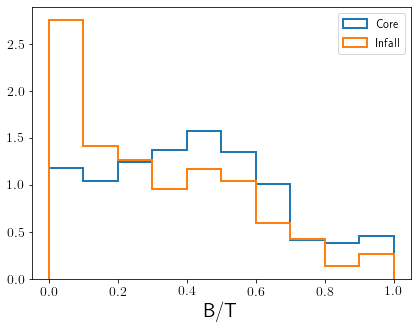

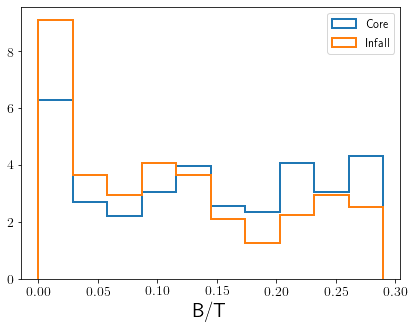

In [159]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-BTcut.png'
b.lcs_compare_BT()#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Comparison of LCS with GSWLC #

- The GSWLC provides a better comparison sample for us.
- I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.
  - I didn't note how I did the match.  I don't see any python programs, so I probably used topcat.
  - redoing on 5/29/20
  - matching LCS_all_size_KE_SFR.fits with GSWLC-X2-LCS-Zoverlap.dat
  - matching NSA RA,DEC with GSWLC RA,DEC
    - 5 arcsec offset
    - best match, symmetric
    - 1 and 2
    - found 1477 pairs (~20 fewer than last time :( )
   - 10 arcsec search radius
     - 1487 pairs
   - 15 arcsec search radius
     - 1490 pairs
- we can use the GSWLC SFRs and Stellar masses for both the LCS and comparison galaxies.  This removes significant uncertainty associated with mixing methods for calculating SFR and Mstar.

- redshift limit $0.01 < z < 0.03$
- mag limit r petrosian $r = 18.0$
- main sequence: $log10(sSFR) > -11$
- explanation of GSWLC-2 catalog http://pages.iu.edu/~salims/gswlc/table2.pdf

**Stellar Mass Limit**

- convert r to Mr at maximum distance of LCS ($z=.0433$)
- then plot Mstar vs Mr, and estimate Mstar limit from Mr limit

**SFR Limit**
- Salim+2018 use $log10(sSFR) > -11$ to select star-forming galaxies
- $log10(sSFR) < -11.5$ should be considered upper limits GSWLC-A (Salim+2018, pg 11, col2)
  - we use this as our sSFR limit
- for SF galaxies, SFR errors are typically below 0.1dex

**Environment Catalogs**
- yang+07
- tempel+2012 - http://www.aai.ee/~elmo/dr8groups/readme.txt
- decarvalha+2017

# SFR - Mstar: no B/T cut #

repeating above three plots, but for SFR vs Mstar

### SFR-M*: LCS core vs GSWLC field, no BT cut ###

* SFRs are VERY different
* stellar masses are different

**need to make a mass-matched sample?**
as a counter point, the difference in stellar mass distributions are due to the 
GSWLC sample having lower mass galaxies. This would increase the fraction of low-SFR galaxies in the GSWLC sample, yet the LCS core galaxies have even lower SFRs. 

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 4455 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 1.242e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 4.644e-12 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

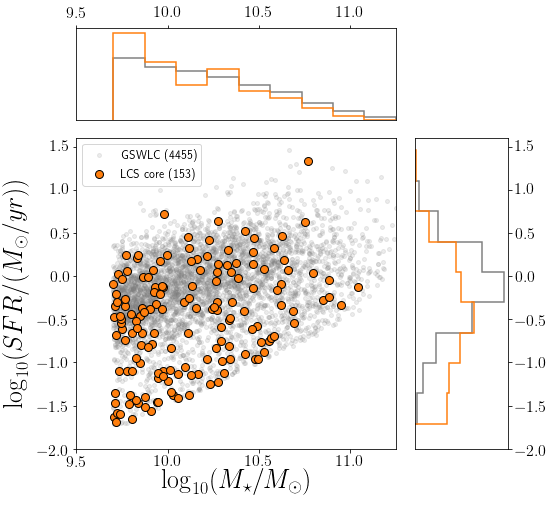

In [160]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### mass-matched sample ###

### LCS Core vs GSWLC, no BT cut, mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 3060 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 8.087e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 3.927e-10 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

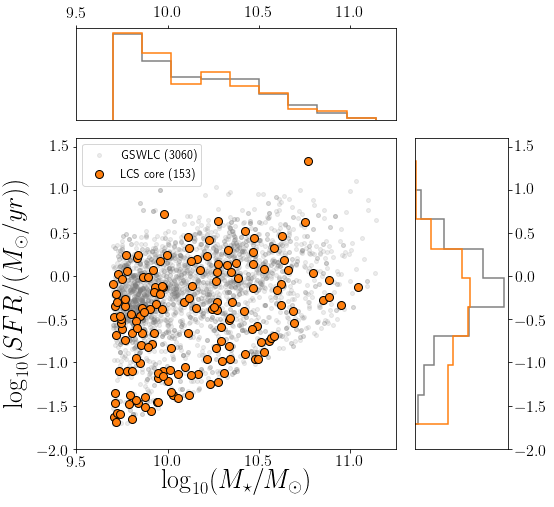

In [161]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

In [162]:
sum(b.lcs.cat['sampleflag'] & b.lcs.cat['membflag'])

91

### SFR-M*: LCS infall vs GSWLC, no BT cut ###

* stellar masses are very diff (more low-mass galaxies in gswlc)
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 4455 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 1.566e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 4.359e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

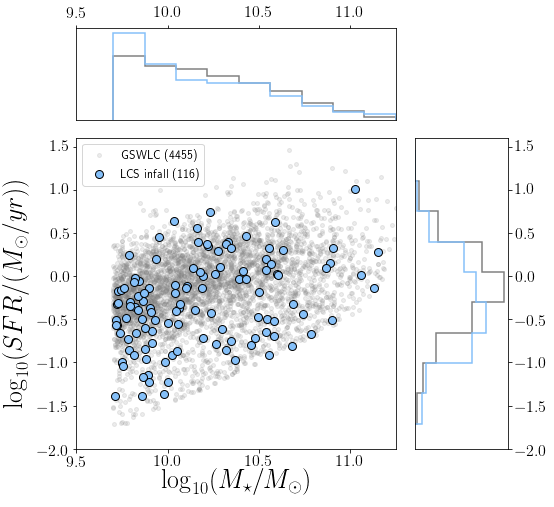

In [163]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### SFR-M*: LCS infall vs GSWLC, no BT cut, with mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 2316 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.04
p-vale = 9.946e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 5.965e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

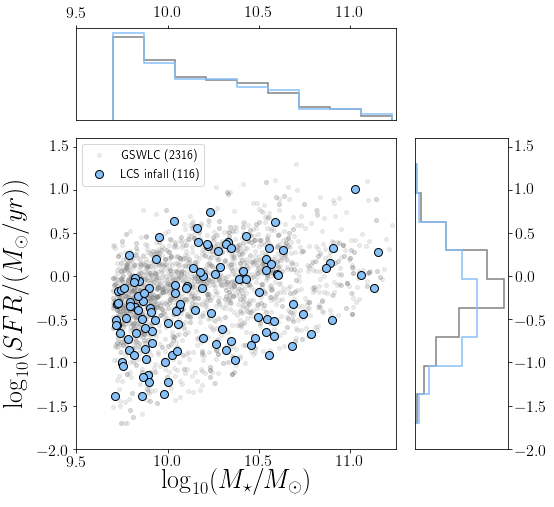

In [164]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### SFR-M*: LCS core vs infall, no BT cut ###

* stellar masses are not diff 
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  116
just checking ... 153 116
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 6.880e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 3.007e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

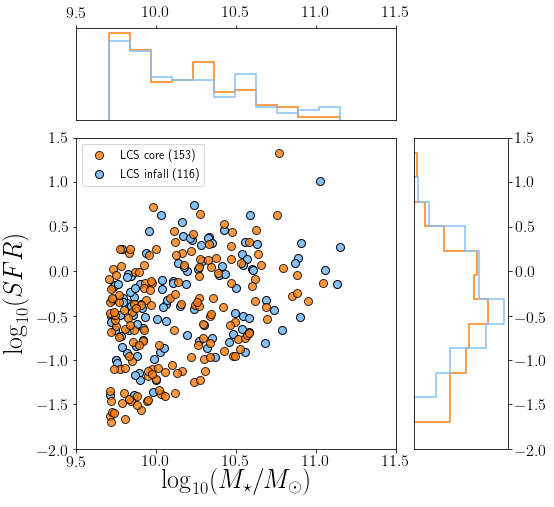

In [165]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# SFR- Mstar with B/T < 0.3 #

### SFR-M*: LCS infall vs GSWLC, with BT cut ###


* SFRs are not different
* stellar masses are very diff (more low-mass galaxies in gswlc)

**again, need mass-matched sample**

* make a cumulative histogram of core masses
* draw a random number [0,1]
* determine mass that corresponds to that point on cumulative histogram
* then select GSWLC galaxy with comparable mass
* how to avoid selecting the same galaxy multiple times?
  * pick closest galaxy that hasn't already been picked
* verify 

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  71
number in gsw sample =  2877
just checking ... 2875 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.228e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.25
p-vale = 2.581e-04 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

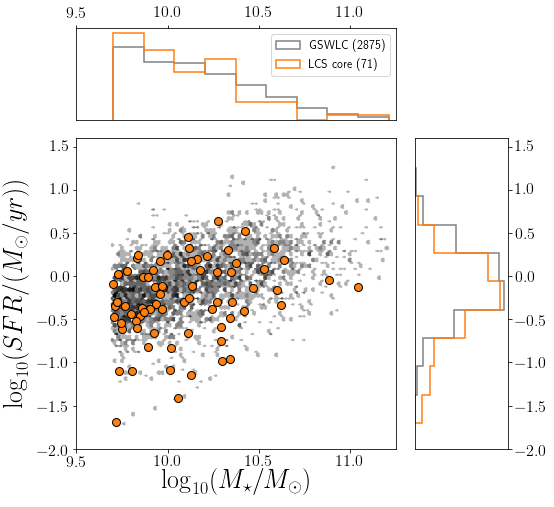

In [166]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

### LCS core vs GSWLC with B/T cut and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  71
number in gsw sample =  2877
just checking ... 1420 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.345e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.23
p-vale = 9.576e-04 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

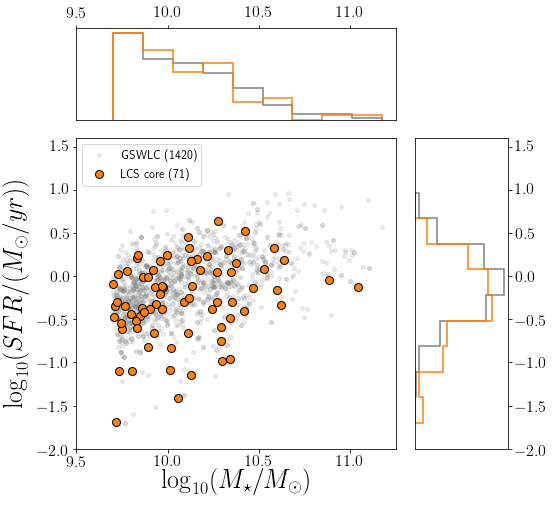

In [167]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in field sample =  12275
number if lcs catalog =  1375
number in field sample =  12275
number if lcs catalog =  1375


<Figure size 489.6x360 with 0 Axes>

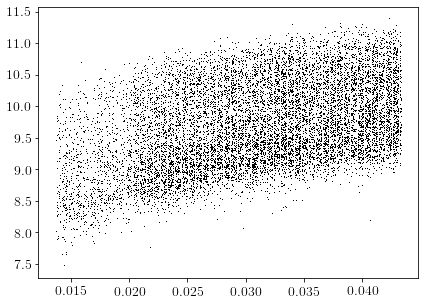

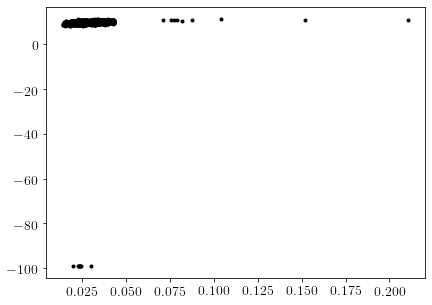

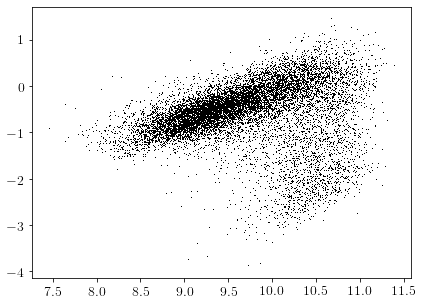

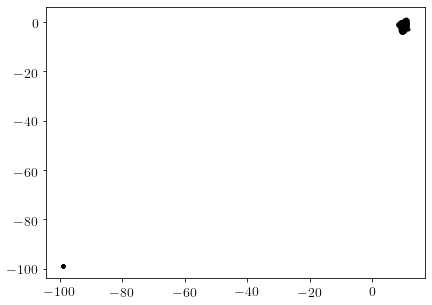

In [168]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7

# STELLAR MASS VS REDSHIFT
plt.figure()
plt.plot(b.gsw.cat['Z_1'],b.gsw.cat['logMstar'],'k,')
print("number in field sample = ",len(b.gsw.cat))
plt.figure()
plt.plot(b.lcs.cat['Z_1'],b.lcs.cat['logMstar'],'k.')
print("number if lcs catalog = ",len(b.lcs.cat))

# SFR VS STELLAR MASS
plt.figure()
plt.plot(b.gsw.cat['logMstar'],b.gsw.cat['logSFR'],'k,')
print("number in field sample = ",len(b.gsw.cat))
plt.figure()
plt.plot(b.lcs.cat['logMstar'],b.lcs.cat['logSFR'],'k.')
print("number if lcs catalog = ",len(b.lcs.cat))



### SFR-M* :  LCS infall vs GSWLC - with BT cut ###

* SFRs are marginally different
* stellar masses are indistinguisable


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  66
number in gsw sample =  2877
just checking ... 2875 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 2.505e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.13
p-vale = 1.972e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

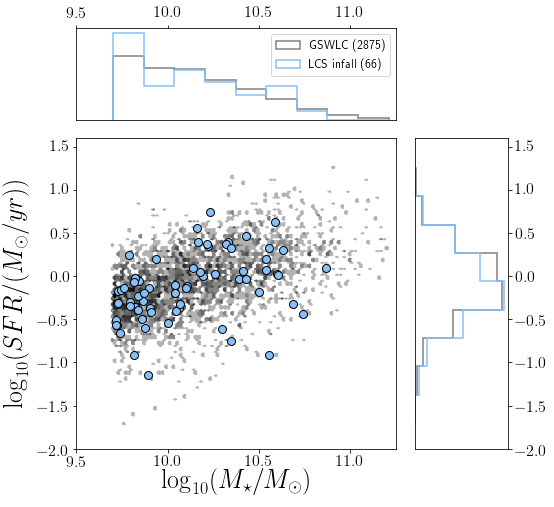

In [169]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsmemb=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)

### LCS infall vs GSWLC, with B/T and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  66
number in gsw sample =  2877
just checking ... 1320 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.835e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.11
p-vale = 3.910e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

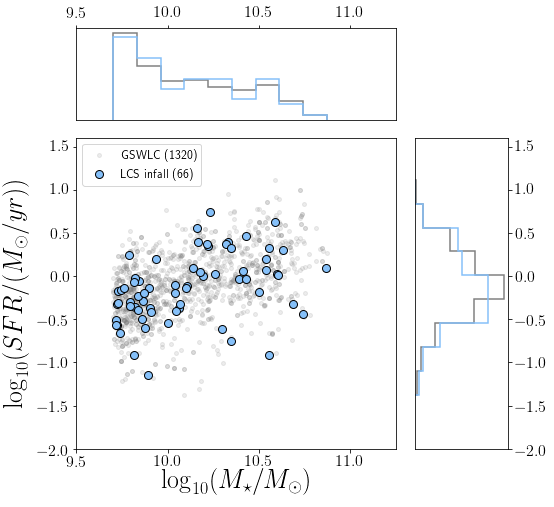

In [170]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsinfall=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)

### SFR - M*: LCS core vs infall, with B/T cut ###

* masses and SFRs are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  66
just checking ... 71 66
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.039e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.15
p-vale = 3.596e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

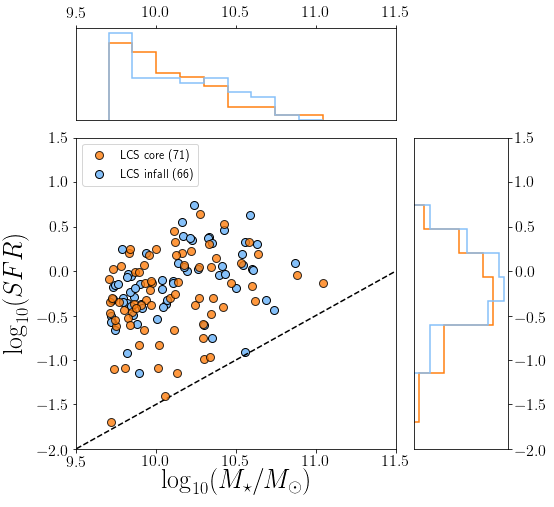

In [197]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# sSFR-Mstar: Compare LCS and GSWLC - no B/T cut #
# (updates from 7/1/2020) #

- limited by stellar mass, ssfr, and B/T < 0.3


### sSFR-M*: LCS core vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  4459
just checking ... 4459 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 1.214e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.26
p-vale = 1.441e-09 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

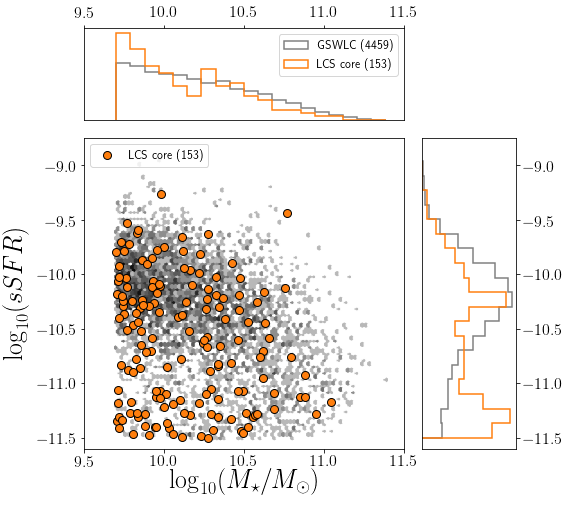

In [172]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### sSFR-M*: LCS core vs GSWLC field, no BT cut, mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  4459
galaxies in slice < # requested 0 20 10.619 0.0758
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  10.619 89
skipping this galaxy
galaxies in slice < # requested 17 20 10.234 0.0157
galaxies in slice < # requested 0 20 10.77 0.2104
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  10.77 127
skipping this galaxy
galaxies in slice < # requested 0 20 10.47 0.0817
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  10.47 141
skipping this galaxy
AFTER MASS MATCHING
number of gswlc =  3060
number of lcs =  153
just checking ... 3060

<Figure size 489.6x360 with 0 Axes>

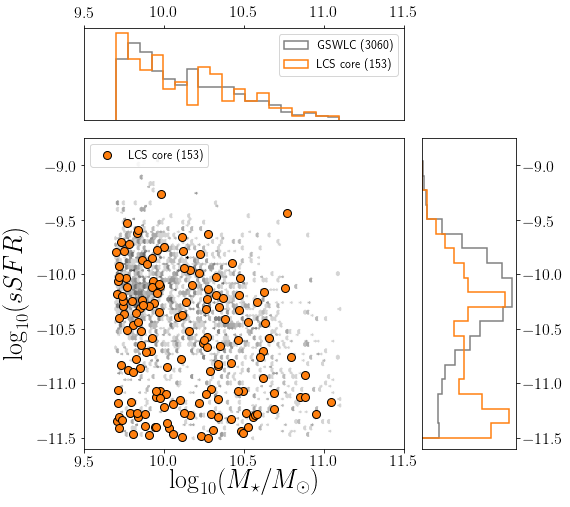

In [189]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

### sSFR-M*: LCS infall vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  116
number in external sample =  4459
just checking ... 4459 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 1.548e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.15
p-vale = 1.360e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

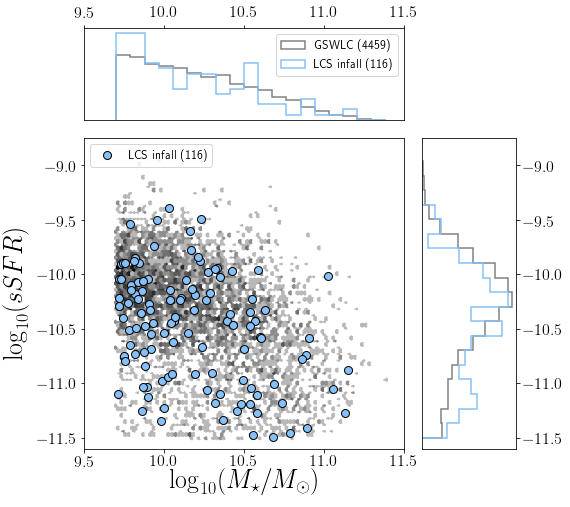

In [179]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### sSFR-M*: LCS core vs GSWLC field, no BT cut, mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  116
number in external sample =  4459
galaxies in slice < # requested 0 20 11.025 0.079
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  11.025 103
skipping this galaxy
AFTER MASS MATCHING
number of gswlc =  2320
number of lcs =  116
just checking ... 2320 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 9.593e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 4.429e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

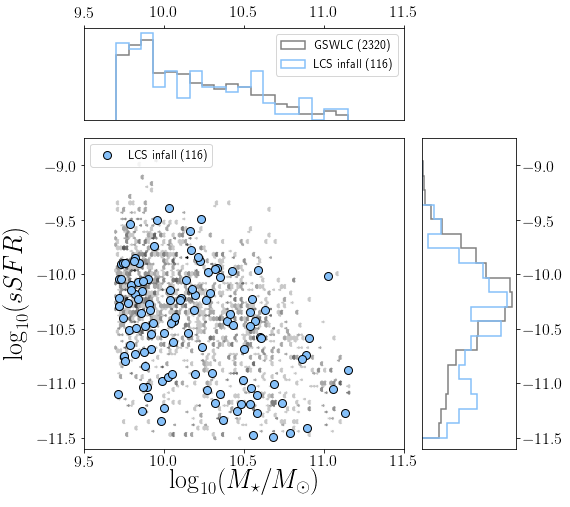

In [190]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### sSFR-M*: LCS Core vs infall, no BT cut ###

* sSFRs are not significantly different
* stellar masses are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  116
just checking ... 153 116
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 6.880e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 1.496e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

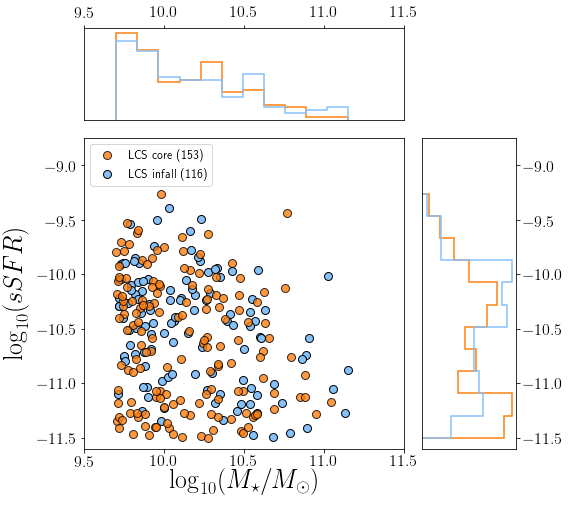

In [181]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut, no mass match ###

* sSFRs are different
* mstar is the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  2877
just checking ... 2877 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.175e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 1.469e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

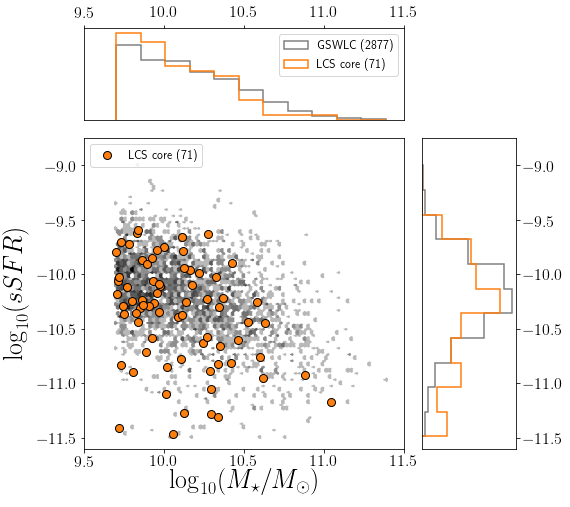

In [195]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,nbins=10,massmatch=False)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut, mass match ###


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  2877
galaxies in slice < # requested 16 20 11.044 0.036
AFTER MASS MATCHING
number of gswlc =  1420
number of lcs =  71
just checking ... 1420 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 8.914e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 5.608e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

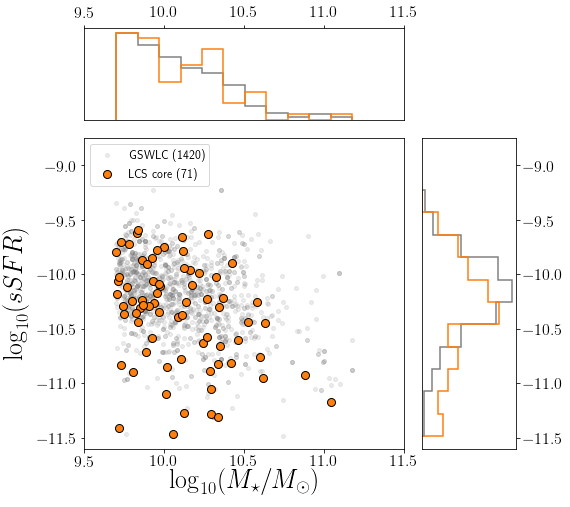

In [192]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,nbins=10,massmatch=True,hexbinflag=False)

### sSFR-M*: infall vs GSWLC with B/T cut, no mass match ###

* sSFRs are indistinguishable
* stellar masses are slightly different same




got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  66
number in external sample =  2877
just checking ... 2877 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 2.489e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.06
p-vale = 9.709e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

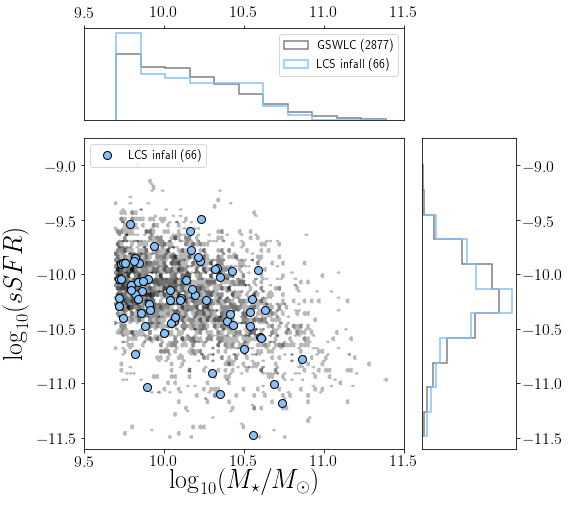

In [193]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=10,coreflag=False,massmatch=False)

# With B/T Cut #

### sSFR-M*: infall vs GSWLC, with BT cut, mass match ###


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  66
number in external sample =  2877
galaxies in slice < # requested 18 20 10.689 0.0232
AFTER MASS MATCHING
number of gswlc =  1320
number of lcs =  66
just checking ... 1320 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.835e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.05
p-vale = 9.894e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

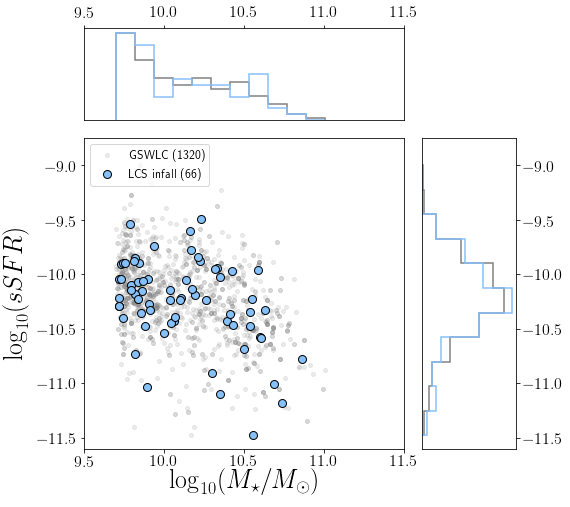

In [194]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=10,massmatch=True,coreflag=False,hexbinflag=False)

### sSR-M*: LCS core vs infall with B/T cut###

* sSFRs are not different
* stellar masses are slightly different

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  66
just checking ... 71 66
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.039e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 2.198e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

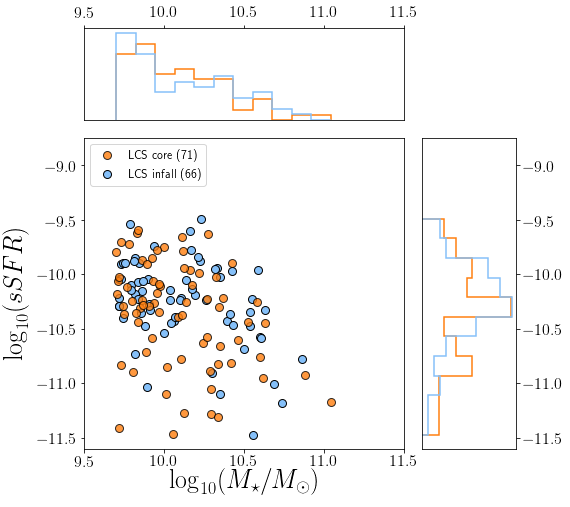

In [186]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# Does sSFR correlate with size ratio #

* correlation is not super convincing, even if spearman rank says its 2.5 sigma

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
SpearmanrResult(correlation=0.18320640225262289, pvalue=0.009779655805273775)


<Figure size 489.6x360 with 0 Axes>

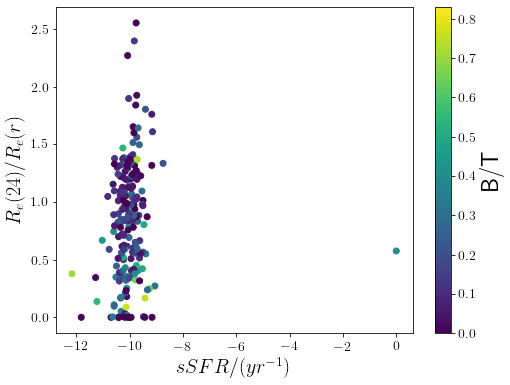

In [187]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
SpearmanrResult(correlation=0.19950291443764404, pvalue=0.012819043023943924)


<Figure size 489.6x360 with 0 Axes>

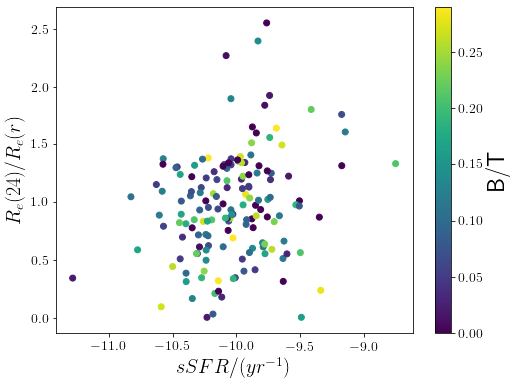

In [188]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)